In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/TH1391_NLMH/NLMH_OnkiemTra/Chap2_Classification_3SVM/irisdata.csv')
data.head()

,Độ dài đài hoa,Độ dài đài hoa.1,Độ dài cánh hoa,Độ rộng cánh hoa,Tên loài
0,5.1,3.5,1.4,0.2,Iris setosa
1,4.9,3.0,1.4,0.2,Iris setosa
2,4.7,3.2,1.3,0.2,Iris setosa
3,4.6,3.1,1.5,0.2,Iris setosa
4,5.0,3.6,1.4,0.2,Iris setosa


In [ ]:
# Chia feature và label
X = data.drop('Tên loài', axis=1)
y = data['Tên loài']

In [ ]:
X.head()

,Độ dài đài hoa,Độ dài đài hoa.1,Độ dài cánh hoa,Độ rộng cánh hoa
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris setosa
1    Iris setosa
2    Iris setosa
3    Iris setosa
4    Iris setosa
Name: Tên loài, dtype: object

In [ ]:
# Chuyển đổi nhãn loại thành các số
label_map = {'Iris setosa': 0, 'Iris virginica': 1}
y = y.map(label_map)

In [ ]:
# Chia tập dữ liệu thành train set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Đánh giá mô hình trên tập test
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Đoán dữ liệu

# Tạo các vector đầu vào dưới dạng DataFrame pandas
flower1 = pd.DataFrame([5, 3.3, 1.4, 0.2]).T
flower1.columns = X_train.columns

flower2 = pd.DataFrame([5.7, 2.8, 4.1, 1.3]).T
flower2.columns = X_train.columns

flower3 = pd.DataFrame([5.9, 3, 5.1, 1.8]).T
flower3.columns = X_train.columns

# Sử dụng mô hình để dự đoán
prediction1 = svm_model.predict(flower1)
prediction2 = svm_model.predict(flower2)
prediction3 = svm_model.predict(flower3)

# Chuyển đổi các dự đoán từ số thành tên loài
label_map_inverse = {0: 'Iris setosa', 1: 'Iris virginica'}

print("Bông hoa 1:", label_map_inverse[prediction1[0]])
print("Bông hoa 2:", label_map_inverse[prediction2[0]])
print("Bông hoa 3:", label_map_inverse[prediction3[0]])


Bông hoa 1: Iris setosa
Bông hoa 2: Iris virginica
Bông hoa 3: Iris virginica


In [ ]:
X2 = X.iloc[:, :2]
y = y  # chỉ ra nhãn của dữ liệu

# Chia tập dữ liệu thành train set và test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [ ]:
# Huấn luyện mô hình SVM
svm_model2 = SVC(kernel='linear')
svm_model2.fit(X_train2, y_train2)

SVC(kernel='linear')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


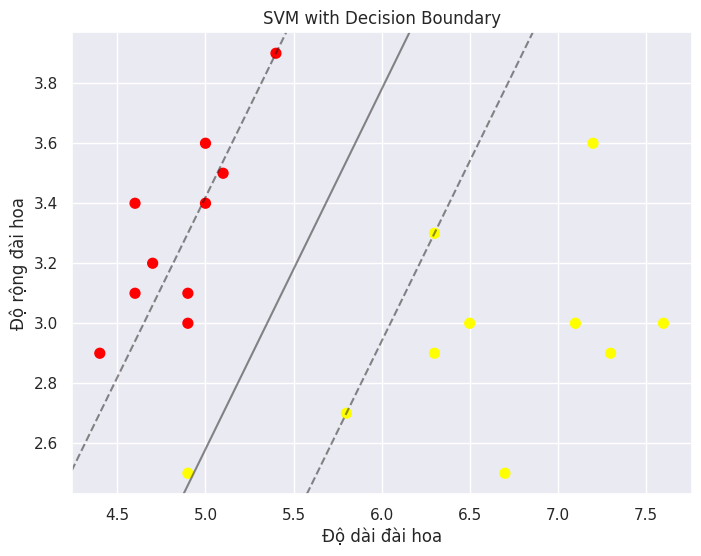

In [ ]:
# vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))

# Tạo biểu đồ scatterplot của dữ liệu bằng cách sử dụng hai đặc trưng đầu tiên:
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y, s=50, cmap='autumn')

# vẽ đường ranh giới quyết định của mô hình - Xác định phạm vi hiện tại của biểu đồ trên cả hai trục:
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# tạo ma trận grid để dự đoán - Tạo ma trận grid để dự đoán, sử dụng phạm vi đã xác định:
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# lấy giá trị quyết định từ mô hình SVM - Lấy giá trị quyết định từ mô hình SVM cho mỗi điểm trên ma trận grid:
Z = svm_model2.decision_function(xy).reshape(XX.shape)

# vẽ đường ranh giới quyết định và margin - Vẽ đường ranh giới quyết định và margin của mô hình:
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Đặt lại phạm vi của trục x và y để phù hợp với dữ liệu ban đầu:
plt.xlim(xlim)
plt.ylim(ylim)

# Thêm nhãn cho các trục và tiêu đề cho biểu đồ:
plt.xlabel('Độ dài đài hoa')
plt.ylabel('Độ rộng đài hoa')
plt.title('SVM with Decision Boundary')

# Hiển thị biểu đồ:
plt.show()

In [ ]:
svm_model2.support_vectors_

array([[5.4, 3.9],
       [4.9, 3.1],
       [5. , 3.4],
       [5.8, 2.7],
       [4.9, 2.5],
       [6.3, 3.3]])

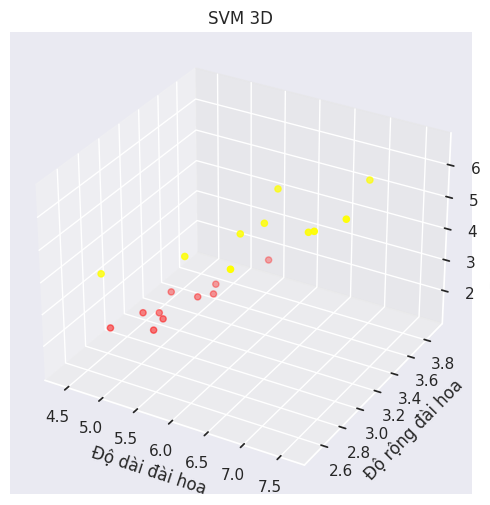

In [ ]:
# Trực quan hóa SVM 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap='autumn')
ax.set_xlabel('Độ dài đài hoa')
ax.set_ylabel('Độ rộng đài hoa')
ax.set_zlabel('Độ dài cánh hoa')
ax.set_title('SVM 3D')
plt.show()

In [ ]:
import plotly.express as px

# Tạo DataFrame từ dữ liệu của bạn
df = pd.DataFrame({
    'Độ dài đài hoa': X.iloc[:, 0],
    'Độ rộng đài hoa': X.iloc[:, 1],
    'Độ dài cánh hoa': X.iloc[:, 2],
    'Tên loài': y
})

fig = px.scatter_3d(df,
                    x='Độ dài đài hoa',
                    y='Độ rộng đài hoa',
                    z='Độ dài cánh hoa',
                    color='Tên loài',
                    labels={'Tên loài': 'Tên loài'})

fig.update_traces(marker=dict(size=3))

# Cập nhật kích thước biểu đồ
# fig.update_layout(width=1200, height=700)
fig.update_layout(height=900)

fig.show()